In [ ]:
#import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [ ]:
#Load  the Dataset

In [11]:
housing = fetch_california_housing()
X = pd.DataFrame(housing.data,columns=housing.feature_names)
y = housing.target
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
#split the Dataset

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#Train the Linear Regression Model

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
#predict & Evaluate the Model

In [18]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-Squared Score:", r2)

Mean Squared Error: 0.5558915986952437
R-Squared Score: 0.5757877060324512


In [ ]:
#Visualisation

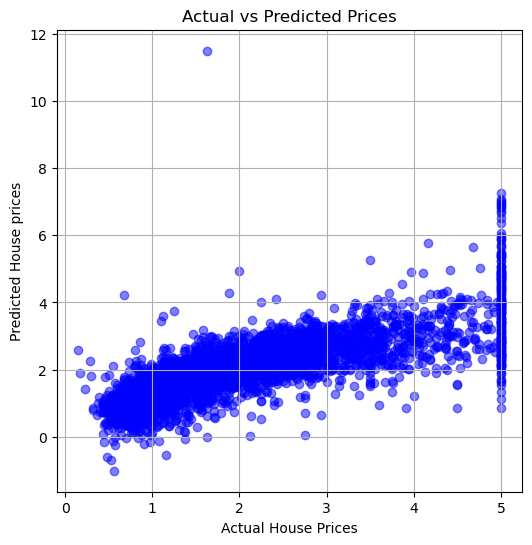

In [20]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House prices")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()

In [ ]:
#check Model Coefficient

In [21]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['coefficient'])
coeff_df

,coefficient
MedInc,0.448675
HouseAge,0.009724
AveRooms,-0.123323
AveBedrms,0.783145
Population,-0.000002
AveOccup,-0.003526
Latitude,-0.419792
Longitude,-0.433708


In [ ]:
#plot feature Importance

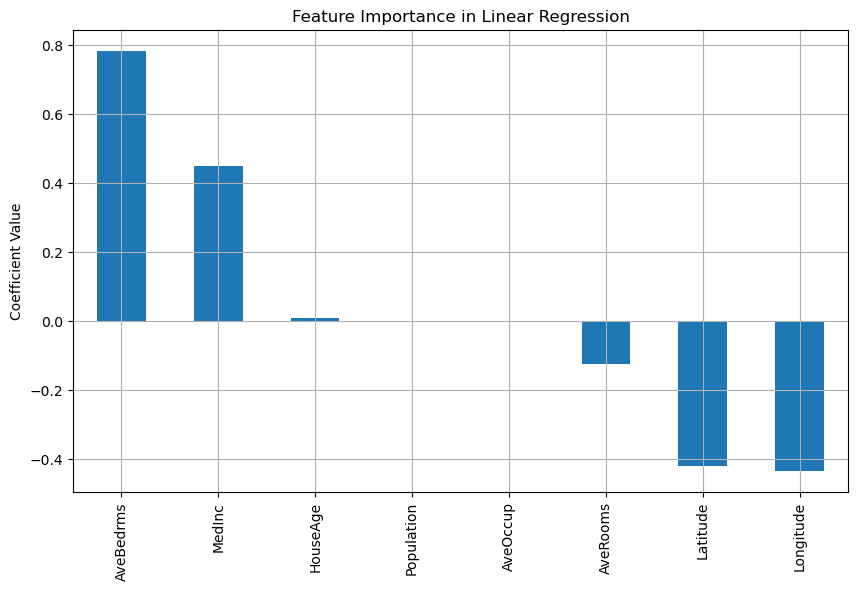

In [32]:
coeff_df.sort_values(by='coefficient', ascending=False).plot(kind='bar', figsize=(10, 6), legend=False)
plt.title("Feature Importance in Linear Regression")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.show()


In [ ]:
#Residual plot (Error Distribution)

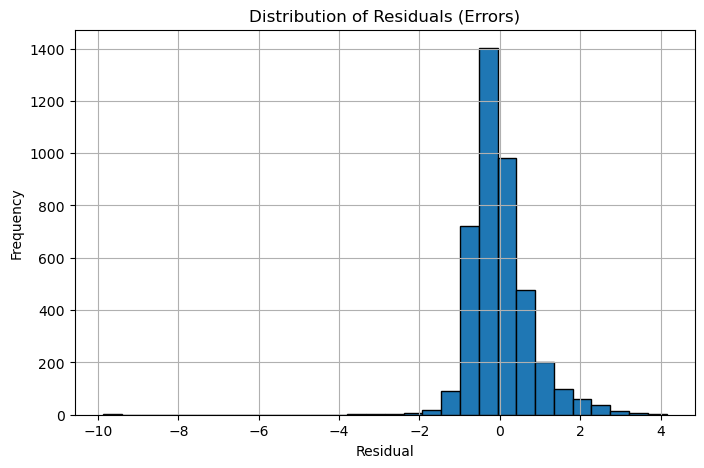

In [29]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title("Distribution of Residuals (Errors)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [ ]:
#Create a prediction function

In [30]:
def predict_price(input_data):
    input_df = pd.DataFrame([input_data], columns=X.columns)
    prediction = model.predict(input_df)
    return prediction[0]
sample_input = X_test.iloc[0]
print("Predicted Price:", predict_price(sample_input))


Predicted Price: 0.7191228416019015
